In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import skfuzzy
from skfuzzy import control as ctrl
import warnings

In [47]:
warnings.filterwarnings('ignore')

# 1. Declarar universos de discurso

In [48]:
#Reclamaciones de clientes
reclamaciones = ctrl.Antecedent(np.arange(0,26, 1),"reclamaciones")
#Nivel de servicio
servicio = ctrl.Antecedent(np.arange(0,101,1), "servicio")
#Frecuencia
frecuencia = ctrl.Antecedent(np.arange(0,53,1), "frecuencia")
#Posibilidad de retiro de cliente
retiro = ctrl.Consequent(np.arange(0,101,1), "retiro")

# 2. Fuzzificar variables

<function matplotlib.pyplot.show(close=None, block=None)>

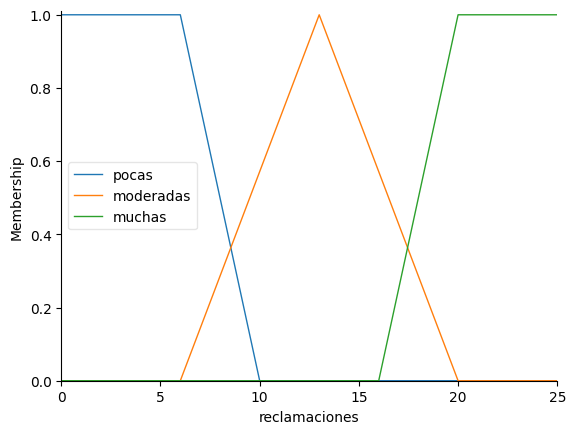

In [49]:
#Reclamaciones de clientes
reclamaciones['pocas'] = skfuzzy.trapmf(reclamaciones.universe,[0,0,6,10])
reclamaciones['moderadas'] = skfuzzy.trimf(reclamaciones.universe, [6,13,20])
reclamaciones['muchas'] = skfuzzy.trapmf(reclamaciones.universe, [16,20,26,26])
reclamaciones.view()
plt.show

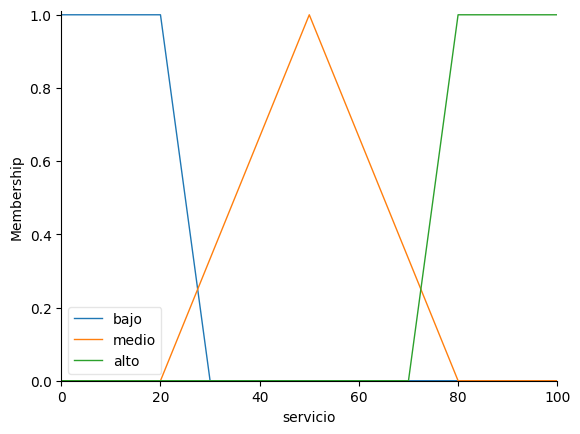

In [50]:
#Nivel de servicio
servicio["bajo"] = skfuzzy.trapmf(servicio.universe, [0,0,20,30])
servicio["medio"] = skfuzzy.trimf(servicio.universe, [20,50,80])
servicio["alto"] = skfuzzy.trapmf(servicio.universe, [70,80,100,100])

servicio.view()
plt.show()

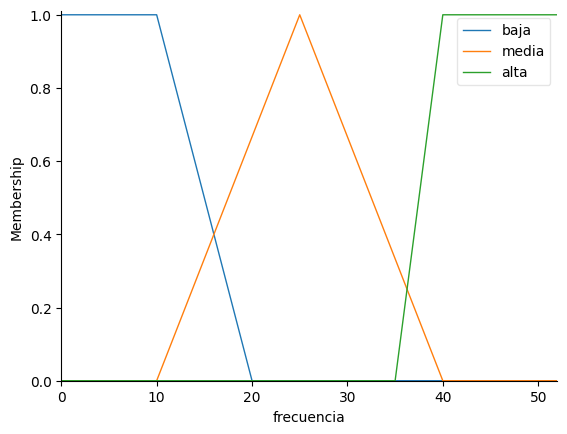

In [51]:
#Frecuencia de visita
frecuencia["baja"] = skfuzzy.trapmf(frecuencia.universe, [0,0,10,20])
frecuencia["media"] = skfuzzy.trimf(frecuencia.universe, [10,25,40])
frecuencia["alta"] = skfuzzy.trapmf(frecuencia.universe, [35,40,52,52])

frecuencia.view()
plt.show()

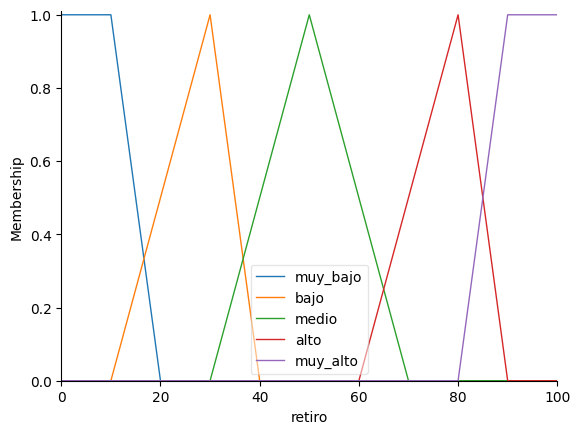

In [52]:
#Probabilidad de retiro de cliente
retiro['muy_bajo'] = skfuzzy.trapmf(retiro.universe, [0,0,10,20])
retiro['bajo'] = skfuzzy.trimf(retiro.universe, [10,30,40])
retiro['medio'] = skfuzzy.trimf(retiro.universe, [30,50,70])
retiro['alto'] = skfuzzy.trimf(retiro.universe, [60,80,90])
retiro['muy_alto'] = skfuzzy.trapmf(retiro.universe, [80,90,100,100])

retiro.view()
plt.show()

# 3. Crear base de conocimiento

In [53]:
regla1 = ctrl.Rule(reclamaciones['muchas']&servicio['alto']|frecuencia['alta'], retiro['bajo'])
regla2 = ctrl.Rule(reclamaciones['muchas']&servicio['alto']|frecuencia['media'], retiro['medio'])
regla3 = ctrl.Rule(reclamaciones['muchas']&servicio['alto']|frecuencia['baja'], retiro['alto'])
regla4 = ctrl.Rule(reclamaciones['muchas']&servicio['medio']|frecuencia['alta'], retiro['alto'])
regla5 = ctrl.Rule(reclamaciones['muchas']&servicio['medio']|frecuencia['media'], retiro['alto'])
regla6 = ctrl.Rule(reclamaciones['muchas']&servicio['medio']|frecuencia['baja'], retiro['muy_alto'])
regla7 = ctrl.Rule(reclamaciones['muchas']&servicio['bajo']|frecuencia['alta'], retiro['medio'])
regla8 = ctrl.Rule(reclamaciones['muchas']&servicio['bajo']|frecuencia['media'], retiro['alto'])
regla9 = ctrl.Rule(reclamaciones['muchas']&servicio['bajo']|frecuencia['baja'], retiro['muy_alto'])
regla10 = ctrl.Rule(reclamaciones['moderadas']&servicio['alto']|frecuencia['alta'], retiro['bajo'])
regla11 = ctrl.Rule(reclamaciones['moderadas']&servicio['alto']|frecuencia['media'], retiro['bajo'])
regla12 = ctrl.Rule(reclamaciones['moderadas']&servicio['alto']|frecuencia['baja'], retiro['medio'])
regla13 = ctrl.Rule(reclamaciones['moderadas']&servicio['medio']|frecuencia['alta'], retiro['medio'])
regla14 = ctrl.Rule(reclamaciones['moderadas']&servicio['medio']|frecuencia['media'], retiro['alto'])
regla15 = ctrl.Rule(reclamaciones['moderadas']&servicio['medio']|frecuencia['baja'], retiro['alto'])
regla16 = ctrl.Rule(reclamaciones['moderadas']&servicio['bajo']|frecuencia['alta'], retiro['medio'])
regla17 = ctrl.Rule(reclamaciones['moderadas']&servicio['bajo']|frecuencia['media'], retiro['alto'])
regla18 = ctrl.Rule(reclamaciones['moderadas']&servicio['bajo']|frecuencia['baja'], retiro['muy_alto'])
regla19 = ctrl.Rule(reclamaciones['pocas']&servicio['alto']|frecuencia['alta'], retiro['muy_bajo'])
regla20 = ctrl.Rule(reclamaciones['pocas']&servicio['alto']|frecuencia['media'], retiro['muy_bajo'])
regla21 = ctrl.Rule(reclamaciones['pocas']&servicio['alto']|frecuencia['baja'], retiro['bajo'])
regla22 = ctrl.Rule(reclamaciones['pocas']&servicio['medio']|frecuencia['alta'], retiro['bajo'])
regla23 = ctrl.Rule(reclamaciones['pocas']&servicio['medio']|frecuencia['media'], retiro['medio'])
regla24 = ctrl.Rule(reclamaciones['pocas']&servicio['medio']|frecuencia['baja'], retiro['medio'])
regla25 = ctrl.Rule(reclamaciones['pocas']&servicio['bajo']|frecuencia['alta'], retiro['medio'])
regla26 = ctrl.Rule(reclamaciones['pocas']&servicio['bajo']|frecuencia['media'], retiro['alto'])
regla27 = ctrl.Rule(reclamaciones['pocas']&servicio['bajo']|frecuencia['baja'], retiro['muy_alto'])



# Activar el motor de inferencia

In [55]:
probabilidad_perdida = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18,regla19,regla20,regla21,regla22,regla23,regla24,regla25,regla26,regla27])	

# Utilizar el SIB

# Escenario 1

Resultado: 60.082774049216994


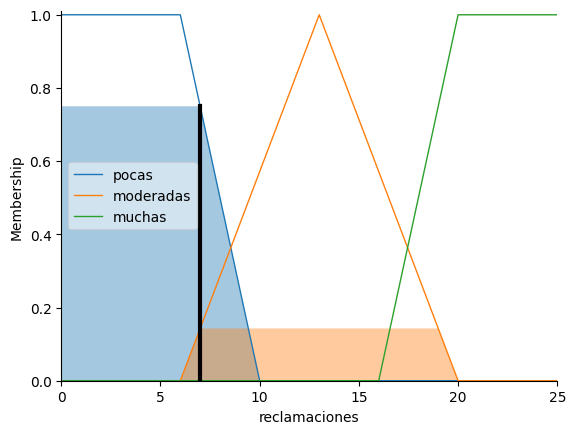

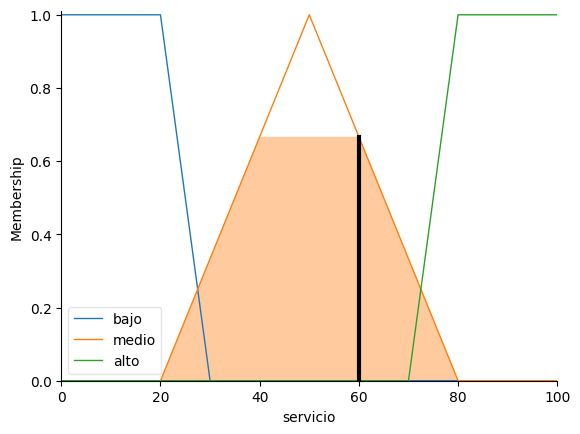

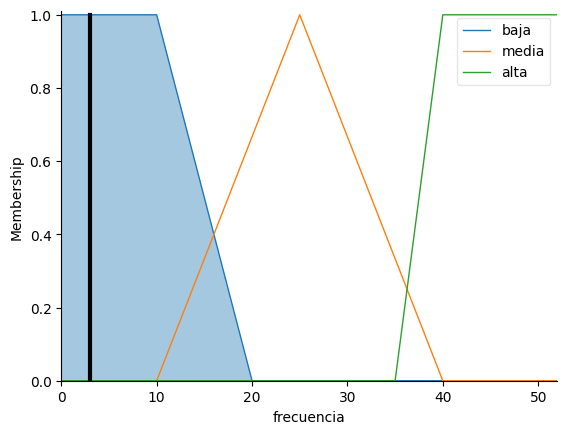

In [60]:
riesgoCliente.input['reclamaciones'] = 7
riesgoCliente.input['servicio'] = 60
riesgoCliente.input['frecuencia'] = 3

riesgoCliente.compute()
print(f"Resultado: {riesgoCliente.output['retiro']}")

# Reglas activadas
reclamaciones.view(sim = riesgoCliente)
servicio.view(sim = riesgoCliente)
frecuencia.view(sim = riesgoCliente)


# Escenario 2

Resultado: 60.082774049216994


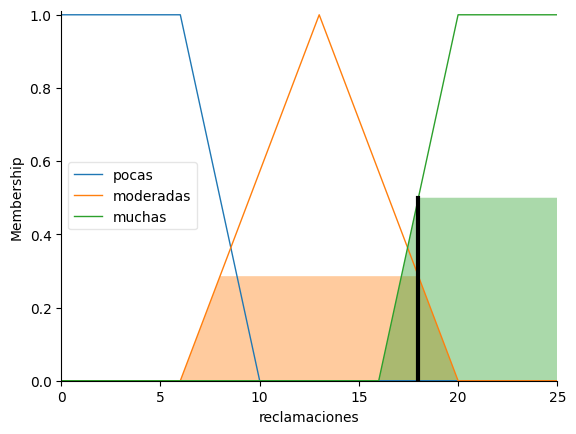

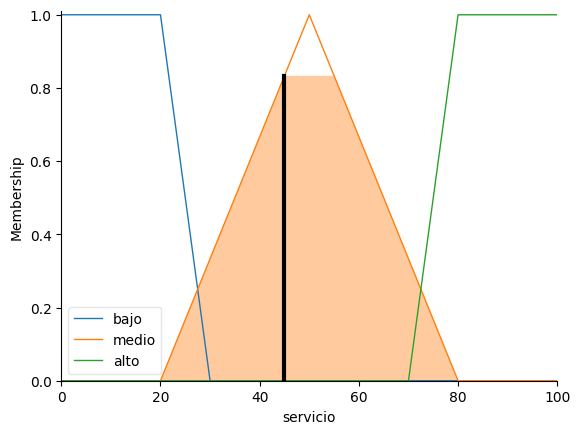

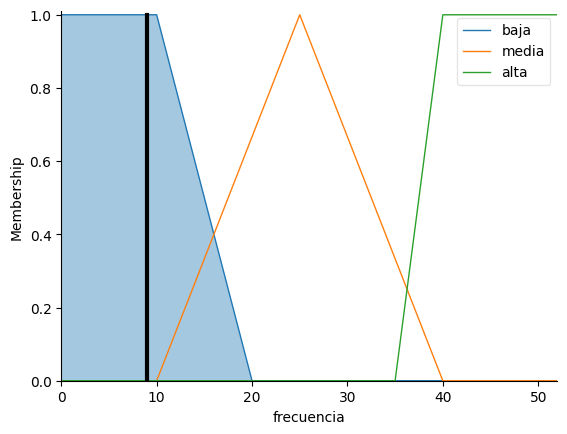

In [61]:
riesgoCliente.input['reclamaciones'] = 18
riesgoCliente.input['servicio'] = 45
riesgoCliente.input['frecuencia'] = 9

riesgoCliente.compute()
print(f"Resultado: {riesgoCliente.output['retiro']}")

# Reglas activadas
reclamaciones.view(sim = riesgoCliente)
servicio.view(sim = riesgoCliente)
frecuencia.view(sim = riesgoCliente)

# Escenario 3

Resultado: 39.93068788265728


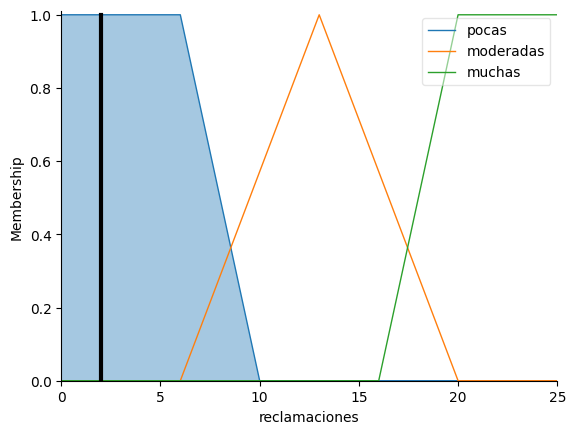

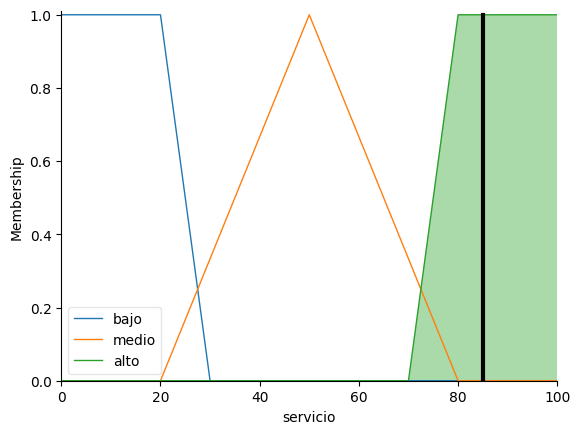

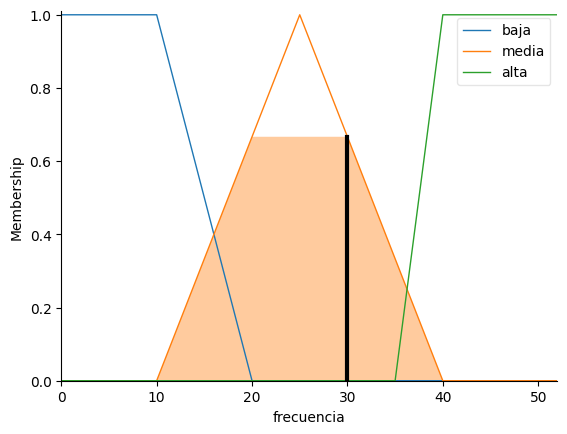

In [62]:
riesgoCliente.input['reclamaciones'] = 2
riesgoCliente.input['servicio'] = 85
riesgoCliente.input['frecuencia'] = 30

riesgoCliente.compute()
print(f"Resultado: {riesgoCliente.output['retiro']}")

# Reglas activadas
reclamaciones.view(sim = riesgoCliente)
servicio.view(sim = riesgoCliente)
frecuencia.view(sim = riesgoCliente)

# Escenario 4

Resultado: 41.37496553625588


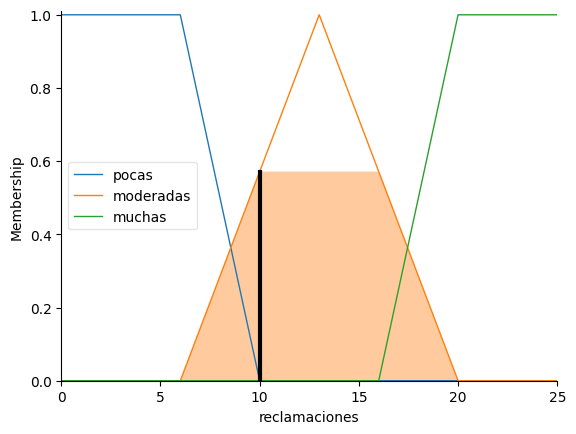

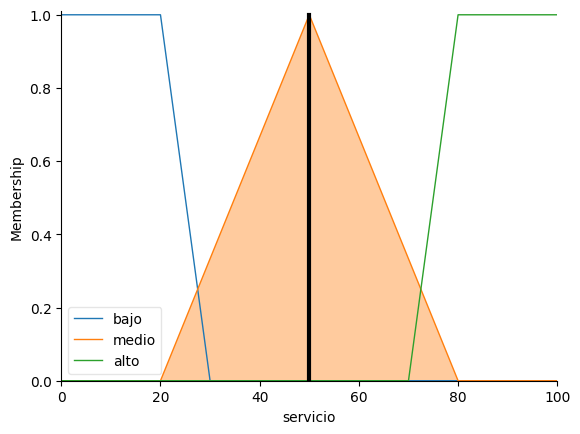

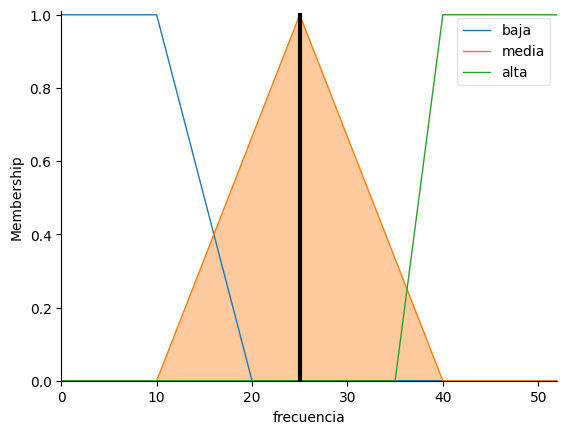

In [63]:
riesgoCliente.input['reclamaciones'] = 10
riesgoCliente.input['servicio'] = 50
riesgoCliente.input['frecuencia'] = 25

riesgoCliente.compute()
print(f"Resultado: {riesgoCliente.output['retiro']}")

# Reglas activadas
reclamaciones.view(sim = riesgoCliente)
servicio.view(sim = riesgoCliente)
frecuencia.view(sim = riesgoCliente)